In [1]:
lr = 1e-4
bs = 32
val_split = 0.80
num_epochs = 10
num_classes = 2
MOMENTUM = 0.9
epochs = 10

In [2]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils import data
import numpy as np
import torchvision
from  numpy import exp, absolute, asarray
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time, os, json, random, gc, copy, math, multiprocessing
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score,f1_score,precision_score ,recall_score 
from PIL import Image
from pathlib import Path

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

/home/ppin-1/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


In [3]:
img_path = str(Path().resolve().parent.parent.parent) + "/Datasets/Benchmark/S.Cervisiae/"

In [4]:
tr_dir = img_path + "sub/"
ho_dir = img_path + "HO/"

In [5]:
train_transforms = transforms.Compose([transforms.ToTensor()])
ho_transforms = transforms.Compose([transforms.ToTensor()])
train_data = datasets.ImageFolder(tr_dir, transform=train_transforms)
ho_data = datasets.ImageFolder(ho_dir, transform=ho_transforms)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
holoader = torch.utils.data.DataLoader(ho_data, batch_size=bs)
print(train_data.class_to_idx)
print(ho_data.class_to_idx)

{'neg_sub': 0, 'pos_sub': 1}
{'neg_sub': 0, 'pos_sub': 1}


In [6]:
print(trainloader.dataset.classes)
print(holoader.dataset.classes)

['neg_sub', 'pos_sub']
['neg_sub', 'pos_sub']


In [7]:
model = torchvision.models.densenet201()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=MOMENTUM)
model.classifier = nn.Linear(in_features = model.classifier.in_features, out_features = num_classes)
model = model.to(device)

In [8]:
print(model.classifier.in_features)

1920


In [8]:
steps = 0
running_loss = 0
print_every = 100
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:          
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}")
            running_loss = 0
torch.save(model, 'finalmodel-full.pth')

Epoch 1/10.. Train loss: 0.704
Epoch 1/10.. Train loss: 0.702
Epoch 1/10.. Train loss: 0.701
Epoch 1/10.. Train loss: 0.698
Epoch 1/10.. Train loss: 0.694
Epoch 1/10.. Train loss: 0.696
Epoch 1/10.. Train loss: 0.695
Epoch 1/10.. Train loss: 0.696
Epoch 1/10.. Train loss: 0.696
Epoch 1/10.. Train loss: 0.695
Epoch 1/10.. Train loss: 0.695
Epoch 1/10.. Train loss: 0.693
Epoch 1/10.. Train loss: 0.690
Epoch 1/10.. Train loss: 0.687
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.690
Epoch 1/10.. Train loss: 0.689
Epoch 1/10.. Train loss: 0.693
Epoch 1/10.. Train loss: 0.687
Epoch 1/10.. Train loss: 0.689
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.686
Epoch 1/10.. Train loss: 0.684
Epoch 1/10.. Train loss: 0.687
Epoch 1/10.. Train loss: 0.686
Epoch 1/10.. Train loss: 0.682
Epoch 1/10.. Train loss: 0.690
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.681
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.685
Epoch 1/

Epoch 1/10.. Train loss: 0.642
Epoch 1/10.. Train loss: 0.638
Epoch 1/10.. Train loss: 0.636
Epoch 1/10.. Train loss: 0.641
Epoch 1/10.. Train loss: 0.634
Epoch 1/10.. Train loss: 0.641
Epoch 1/10.. Train loss: 0.633
Epoch 1/10.. Train loss: 0.630
Epoch 1/10.. Train loss: 0.635
Epoch 1/10.. Train loss: 0.638
Epoch 1/10.. Train loss: 0.630
Epoch 1/10.. Train loss: 0.637
Epoch 1/10.. Train loss: 0.640
Epoch 1/10.. Train loss: 0.632
Epoch 1/10.. Train loss: 0.629
Epoch 1/10.. Train loss: 0.625
Epoch 1/10.. Train loss: 0.637
Epoch 1/10.. Train loss: 0.630
Epoch 1/10.. Train loss: 0.632
Epoch 1/10.. Train loss: 0.643
Epoch 1/10.. Train loss: 0.634
Epoch 1/10.. Train loss: 0.633
Epoch 1/10.. Train loss: 0.627
Epoch 1/10.. Train loss: 0.632
Epoch 1/10.. Train loss: 0.633
Epoch 1/10.. Train loss: 0.629
Epoch 1/10.. Train loss: 0.632
Epoch 1/10.. Train loss: 0.622
Epoch 1/10.. Train loss: 0.629
Epoch 1/10.. Train loss: 0.638
Epoch 1/10.. Train loss: 0.630
Epoch 1/10.. Train loss: 0.622
Epoch 1/

Epoch 1/10.. Train loss: 0.458
Epoch 1/10.. Train loss: 0.449
Epoch 1/10.. Train loss: 0.453
Epoch 1/10.. Train loss: 0.448
Epoch 1/10.. Train loss: 0.451
Epoch 1/10.. Train loss: 0.427
Epoch 1/10.. Train loss: 0.434
Epoch 1/10.. Train loss: 0.450
Epoch 1/10.. Train loss: 0.430
Epoch 1/10.. Train loss: 0.420
Epoch 1/10.. Train loss: 0.451
Epoch 1/10.. Train loss: 0.442
Epoch 1/10.. Train loss: 0.456
Epoch 1/10.. Train loss: 0.448
Epoch 1/10.. Train loss: 0.432
Epoch 1/10.. Train loss: 0.426
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.446
Epoch 1/10.. Train loss: 0.409
Epoch 1/10.. Train loss: 0.412
Epoch 1/10.. Train loss: 0.432
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.419
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.425
Epoch 1/10.. Train loss: 0.418
Epoch 1/10.. Train loss: 0.421
Epoch 1/10.. Train loss: 0.428
Epoch 1/10.. Train loss: 0.419
Epoch 1/10.. Train loss: 0.435
Epoch 1/10.. Train loss: 0.422
Epoch 1/

Epoch 2/10.. Train loss: 0.292
Epoch 2/10.. Train loss: 0.315
Epoch 2/10.. Train loss: 0.318
Epoch 2/10.. Train loss: 0.321
Epoch 2/10.. Train loss: 0.323
Epoch 2/10.. Train loss: 0.308
Epoch 2/10.. Train loss: 0.309
Epoch 2/10.. Train loss: 0.319
Epoch 2/10.. Train loss: 0.301
Epoch 2/10.. Train loss: 0.303
Epoch 2/10.. Train loss: 0.307
Epoch 2/10.. Train loss: 0.329
Epoch 2/10.. Train loss: 0.318
Epoch 2/10.. Train loss: 0.314
Epoch 2/10.. Train loss: 0.310
Epoch 2/10.. Train loss: 0.316
Epoch 2/10.. Train loss: 0.320
Epoch 2/10.. Train loss: 0.323
Epoch 2/10.. Train loss: 0.315
Epoch 2/10.. Train loss: 0.318
Epoch 2/10.. Train loss: 0.323
Epoch 2/10.. Train loss: 0.317
Epoch 2/10.. Train loss: 0.321
Epoch 2/10.. Train loss: 0.311
Epoch 2/10.. Train loss: 0.300
Epoch 2/10.. Train loss: 0.323
Epoch 2/10.. Train loss: 0.309
Epoch 2/10.. Train loss: 0.331
Epoch 2/10.. Train loss: 0.319
Epoch 2/10.. Train loss: 0.336
Epoch 2/10.. Train loss: 0.307
Epoch 2/10.. Train loss: 0.317
Epoch 2/

Epoch 2/10.. Train loss: 0.273
Epoch 2/10.. Train loss: 0.262
Epoch 2/10.. Train loss: 0.269
Epoch 2/10.. Train loss: 0.287
Epoch 2/10.. Train loss: 0.267
Epoch 2/10.. Train loss: 0.275
Epoch 2/10.. Train loss: 0.273
Epoch 2/10.. Train loss: 0.260
Epoch 2/10.. Train loss: 0.269
Epoch 2/10.. Train loss: 0.264
Epoch 2/10.. Train loss: 0.273
Epoch 2/10.. Train loss: 0.252
Epoch 2/10.. Train loss: 0.272
Epoch 2/10.. Train loss: 0.276
Epoch 2/10.. Train loss: 0.260
Epoch 2/10.. Train loss: 0.275
Epoch 2/10.. Train loss: 0.257
Epoch 2/10.. Train loss: 0.282
Epoch 2/10.. Train loss: 0.267
Epoch 2/10.. Train loss: 0.262
Epoch 2/10.. Train loss: 0.263
Epoch 2/10.. Train loss: 0.278
Epoch 2/10.. Train loss: 0.284
Epoch 2/10.. Train loss: 0.269
Epoch 2/10.. Train loss: 0.274
Epoch 2/10.. Train loss: 0.285
Epoch 2/10.. Train loss: 0.264
Epoch 2/10.. Train loss: 0.284
Epoch 2/10.. Train loss: 0.259
Epoch 2/10.. Train loss: 0.275
Epoch 2/10.. Train loss: 0.286
Epoch 2/10.. Train loss: 0.272
Epoch 2/

Epoch 3/10.. Train loss: 0.242
Epoch 3/10.. Train loss: 0.236
Epoch 3/10.. Train loss: 0.267
Epoch 3/10.. Train loss: 0.239
Epoch 3/10.. Train loss: 0.234
Epoch 3/10.. Train loss: 0.233
Epoch 3/10.. Train loss: 0.262
Epoch 3/10.. Train loss: 0.242
Epoch 3/10.. Train loss: 0.248
Epoch 3/10.. Train loss: 0.247
Epoch 3/10.. Train loss: 0.245
Epoch 3/10.. Train loss: 0.236
Epoch 3/10.. Train loss: 0.248
Epoch 3/10.. Train loss: 0.239
Epoch 3/10.. Train loss: 0.244
Epoch 3/10.. Train loss: 0.240
Epoch 3/10.. Train loss: 0.247
Epoch 3/10.. Train loss: 0.235
Epoch 3/10.. Train loss: 0.253
Epoch 3/10.. Train loss: 0.239
Epoch 3/10.. Train loss: 0.241
Epoch 3/10.. Train loss: 0.228
Epoch 3/10.. Train loss: 0.238
Epoch 3/10.. Train loss: 0.238
Epoch 3/10.. Train loss: 0.229
Epoch 3/10.. Train loss: 0.249
Epoch 3/10.. Train loss: 0.240
Epoch 3/10.. Train loss: 0.251
Epoch 3/10.. Train loss: 0.245
Epoch 3/10.. Train loss: 0.239
Epoch 3/10.. Train loss: 0.254
Epoch 3/10.. Train loss: 0.223
Epoch 3/

Epoch 3/10.. Train loss: 0.238
Epoch 3/10.. Train loss: 0.223
Epoch 3/10.. Train loss: 0.230
Epoch 3/10.. Train loss: 0.216
Epoch 3/10.. Train loss: 0.243
Epoch 3/10.. Train loss: 0.229
Epoch 3/10.. Train loss: 0.240
Epoch 3/10.. Train loss: 0.228
Epoch 3/10.. Train loss: 0.228
Epoch 3/10.. Train loss: 0.225
Epoch 3/10.. Train loss: 0.228
Epoch 3/10.. Train loss: 0.248
Epoch 3/10.. Train loss: 0.226
Epoch 3/10.. Train loss: 0.231
Epoch 3/10.. Train loss: 0.234
Epoch 3/10.. Train loss: 0.242
Epoch 3/10.. Train loss: 0.225
Epoch 3/10.. Train loss: 0.235
Epoch 3/10.. Train loss: 0.199
Epoch 3/10.. Train loss: 0.231
Epoch 3/10.. Train loss: 0.214
Epoch 3/10.. Train loss: 0.235
Epoch 3/10.. Train loss: 0.229
Epoch 3/10.. Train loss: 0.225
Epoch 3/10.. Train loss: 0.226
Epoch 3/10.. Train loss: 0.230
Epoch 3/10.. Train loss: 0.223
Epoch 3/10.. Train loss: 0.211
Epoch 3/10.. Train loss: 0.232
Epoch 3/10.. Train loss: 0.241
Epoch 3/10.. Train loss: 0.229
Epoch 3/10.. Train loss: 0.227
Epoch 3/

Epoch 4/10.. Train loss: 0.219
Epoch 4/10.. Train loss: 0.205
Epoch 4/10.. Train loss: 0.212
Epoch 4/10.. Train loss: 0.203
Epoch 4/10.. Train loss: 0.215
Epoch 4/10.. Train loss: 0.207
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.204
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.196
Epoch 4/10.. Train loss: 0.202
Epoch 4/10.. Train loss: 0.207
Epoch 4/10.. Train loss: 0.212
Epoch 4/10.. Train loss: 0.209
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.207
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.209
Epoch 4/10.. Train loss: 0.201
Epoch 4/10.. Train loss: 0.216
Epoch 4/10.. Train loss: 0.197
Epoch 4/10.. Train loss: 0.219
Epoch 4/10.. Train loss: 0.218
Epoch 4/10.. Train loss: 0.209
Epoch 4/10.. Train loss: 0.211
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.203
Epoch 4/10.. Train loss: 0.223
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.231
Epoch 4/10.. Train loss: 0.189
Epoch 4/10.. Train loss: 0.208
Epoch 4/

Epoch 4/10.. Train loss: 0.214
Epoch 4/10.. Train loss: 0.202
Epoch 4/10.. Train loss: 0.184
Epoch 4/10.. Train loss: 0.186
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.227
Epoch 4/10.. Train loss: 0.206
Epoch 4/10.. Train loss: 0.188
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.186
Epoch 4/10.. Train loss: 0.196
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.214
Epoch 4/10.. Train loss: 0.205
Epoch 4/10.. Train loss: 0.210
Epoch 4/10.. Train loss: 0.197
Epoch 4/10.. Train loss: 0.202
Epoch 4/10.. Train loss: 0.212
Epoch 4/10.. Train loss: 0.204
Epoch 4/10.. Train loss: 0.205
Epoch 4/10.. Train loss: 0.201
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.193
Epoch 4/10.. Train loss: 0.211
Epoch 4/10.. Train loss: 0.206
Epoch 4/10.. Train loss: 0.224
Epoch 4/10.. Train loss: 0.188
Epoch 4/10.. Train loss: 0.187
Epoch 4/10.. Train loss: 0.185
Epoch 4/10.. Train loss: 0.196
Epoch 4/10.. Train loss: 0.190
Epoch 4/10.. Train loss: 0.214
Epoch 4/

Epoch 4/10.. Train loss: 0.197
Epoch 4/10.. Train loss: 0.201
Epoch 4/10.. Train loss: 0.187
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.190
Epoch 4/10.. Train loss: 0.185
Epoch 4/10.. Train loss: 0.187
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.194
Epoch 4/10.. Train loss: 0.197
Epoch 4/10.. Train loss: 0.198
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.194
Epoch 4/10.. Train loss: 0.188
Epoch 4/10.. Train loss: 0.190
Epoch 4/10.. Train loss: 0.175
Epoch 4/10.. Train loss: 0.209
Epoch 4/10.. Train loss: 0.214
Epoch 4/10.. Train loss: 0.200
Epoch 4/10.. Train loss: 0.204
Epoch 4/10.. Train loss: 0.193
Epoch 4/10.. Train loss: 0.180
Epoch 4/10.. Train loss: 0.195
Epoch 4/10.. Train loss: 0.185
Epoch 4/10.. Train loss: 0.187
Epoch 4/10.. Train loss: 0.197
Epoch 4/10.. Train loss: 0.190
Epoch 4/10.. Train loss: 0.200
Epoch 4/10.. Train loss: 0.198
Epoch 4/10.. Train loss: 0.199
Epoch 4/10.. Train loss: 0.205
Epoch 4/10.. Train loss: 0.204
Epoch 4/

Epoch 5/10.. Train loss: 0.187
Epoch 5/10.. Train loss: 0.173
Epoch 5/10.. Train loss: 0.192
Epoch 5/10.. Train loss: 0.185
Epoch 5/10.. Train loss: 0.167
Epoch 5/10.. Train loss: 0.197
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.189
Epoch 5/10.. Train loss: 0.165
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.182
Epoch 5/10.. Train loss: 0.165
Epoch 5/10.. Train loss: 0.176
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.161
Epoch 5/10.. Train loss: 0.183
Epoch 5/10.. Train loss: 0.191
Epoch 5/10.. Train loss: 0.184
Epoch 5/10.. Train loss: 0.179
Epoch 5/10.. Train loss: 0.176
Epoch 5/10.. Train loss: 0.184
Epoch 5/10.. Train loss: 0.190
Epoch 5/10.. Train loss: 0.188
Epoch 5/10.. Train loss: 0.179
Epoch 5/10.. Train loss: 0.191
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.180
Epoch 5/10.. Train loss: 0.171
Epoch 5/10.. Train loss: 0.190
Epoch 5/10.. Train loss: 0.187
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.189
Epoch 5/

Epoch 5/10.. Train loss: 0.195
Epoch 5/10.. Train loss: 0.157
Epoch 5/10.. Train loss: 0.171
Epoch 5/10.. Train loss: 0.171
Epoch 5/10.. Train loss: 0.169
Epoch 5/10.. Train loss: 0.181
Epoch 5/10.. Train loss: 0.184
Epoch 5/10.. Train loss: 0.170
Epoch 5/10.. Train loss: 0.189
Epoch 5/10.. Train loss: 0.175
Epoch 5/10.. Train loss: 0.176
Epoch 5/10.. Train loss: 0.168
Epoch 5/10.. Train loss: 0.192
Epoch 5/10.. Train loss: 0.176
Epoch 5/10.. Train loss: 0.181
Epoch 5/10.. Train loss: 0.162
Epoch 5/10.. Train loss: 0.169
Epoch 5/10.. Train loss: 0.176
Epoch 5/10.. Train loss: 0.170
Epoch 5/10.. Train loss: 0.171
Epoch 5/10.. Train loss: 0.169
Epoch 5/10.. Train loss: 0.183
Epoch 5/10.. Train loss: 0.172
Epoch 5/10.. Train loss: 0.164
Epoch 5/10.. Train loss: 0.151
Epoch 5/10.. Train loss: 0.168
Epoch 5/10.. Train loss: 0.158
Epoch 5/10.. Train loss: 0.178
Epoch 5/10.. Train loss: 0.187
Epoch 5/10.. Train loss: 0.175
Epoch 5/10.. Train loss: 0.183
Epoch 5/10.. Train loss: 0.166
Epoch 5/

Epoch 6/10.. Train loss: 0.152
Epoch 6/10.. Train loss: 0.167
Epoch 6/10.. Train loss: 0.152
Epoch 6/10.. Train loss: 0.153
Epoch 6/10.. Train loss: 0.166
Epoch 6/10.. Train loss: 0.152
Epoch 6/10.. Train loss: 0.164
Epoch 6/10.. Train loss: 0.164
Epoch 6/10.. Train loss: 0.157
Epoch 6/10.. Train loss: 0.168
Epoch 6/10.. Train loss: 0.163
Epoch 6/10.. Train loss: 0.169
Epoch 6/10.. Train loss: 0.158
Epoch 6/10.. Train loss: 0.163
Epoch 6/10.. Train loss: 0.165
Epoch 6/10.. Train loss: 0.179
Epoch 6/10.. Train loss: 0.169
Epoch 6/10.. Train loss: 0.169
Epoch 6/10.. Train loss: 0.166
Epoch 6/10.. Train loss: 0.171
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.162
Epoch 6/10.. Train loss: 0.185
Epoch 6/10.. Train loss: 0.147
Epoch 6/10.. Train loss: 0.166
Epoch 6/10.. Train loss: 0.176
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.151
Epoch 6/10.. Train loss: 0.157
Epoch 6/10.. Train loss: 0.154
Epoch 6/10.. Train loss: 0.175
Epoch 6/

Epoch 6/10.. Train loss: 0.167
Epoch 6/10.. Train loss: 0.158
Epoch 6/10.. Train loss: 0.151
Epoch 6/10.. Train loss: 0.151
Epoch 6/10.. Train loss: 0.168
Epoch 6/10.. Train loss: 0.161
Epoch 6/10.. Train loss: 0.157
Epoch 6/10.. Train loss: 0.180
Epoch 6/10.. Train loss: 0.159
Epoch 6/10.. Train loss: 0.155
Epoch 6/10.. Train loss: 0.150
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.162
Epoch 6/10.. Train loss: 0.171
Epoch 6/10.. Train loss: 0.153
Epoch 6/10.. Train loss: 0.158
Epoch 6/10.. Train loss: 0.165
Epoch 6/10.. Train loss: 0.158
Epoch 6/10.. Train loss: 0.161
Epoch 6/10.. Train loss: 0.152
Epoch 6/10.. Train loss: 0.170
Epoch 6/10.. Train loss: 0.143
Epoch 6/10.. Train loss: 0.152
Epoch 6/10.. Train loss: 0.146
Epoch 6/10.. Train loss: 0.163
Epoch 6/10.. Train loss: 0.167
Epoch 6/10.. Train loss: 0.153
Epoch 6/10.. Train loss: 0.158
Epoch 6/10.. Train loss: 0.160
Epoch 6/10.. Train loss: 0.163
Epoch 6/10.. Train loss: 0.146
Epoch 6/

Epoch 7/10.. Train loss: 0.150
Epoch 7/10.. Train loss: 0.134
Epoch 7/10.. Train loss: 0.152
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.146
Epoch 7/10.. Train loss: 0.135
Epoch 7/10.. Train loss: 0.144
Epoch 7/10.. Train loss: 0.159
Epoch 7/10.. Train loss: 0.144
Epoch 7/10.. Train loss: 0.140
Epoch 7/10.. Train loss: 0.152
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.138
Epoch 7/10.. Train loss: 0.154
Epoch 7/10.. Train loss: 0.151
Epoch 7/10.. Train loss: 0.151
Epoch 7/10.. Train loss: 0.143
Epoch 7/10.. Train loss: 0.138
Epoch 7/10.. Train loss: 0.139
Epoch 7/10.. Train loss: 0.149
Epoch 7/10.. Train loss: 0.153
Epoch 7/10.. Train loss: 0.158
Epoch 7/10.. Train loss: 0.135
Epoch 7/10.. Train loss: 0.147
Epoch 7/10.. Train loss: 0.135
Epoch 7/10.. Train loss: 0.145
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.140
Epoch 7/10.. Train loss: 0.162
Epoch 7/10.. Train loss: 0.152
Epoch 7/10.. Train loss: 0.157
Epoch 7/10.. Train loss: 0.134
Epoch 7/

Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.137
Epoch 7/10.. Train loss: 0.156
Epoch 7/10.. Train loss: 0.145
Epoch 7/10.. Train loss: 0.150
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.134
Epoch 7/10.. Train loss: 0.141
Epoch 7/10.. Train loss: 0.138
Epoch 7/10.. Train loss: 0.143
Epoch 7/10.. Train loss: 0.130
Epoch 7/10.. Train loss: 0.137
Epoch 7/10.. Train loss: 0.140
Epoch 7/10.. Train loss: 0.135
Epoch 7/10.. Train loss: 0.133
Epoch 7/10.. Train loss: 0.142
Epoch 7/10.. Train loss: 0.150
Epoch 7/10.. Train loss: 0.133
Epoch 7/10.. Train loss: 0.134
Epoch 7/10.. Train loss: 0.149
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.150
Epoch 7/10.. Train loss: 0.148
Epoch 7/10.. Train loss: 0.152
Epoch 7/10.. Train loss: 0.128
Epoch 7/10.. Train loss: 0.155
Epoch 7/10.. Train loss: 0.145
Epoch 7/10.. Train loss: 0.145
Epoch 7/10.. Train loss: 0.150
Epoch 7/10.. Train loss: 0.137
Epoch 7/10.. Train loss: 0.152
Epoch 7/10.. Train loss: 0.144
Epoch 7/

Epoch 7/10.. Train loss: 0.129
Epoch 7/10.. Train loss: 0.135
Epoch 7/10.. Train loss: 0.145
Epoch 7/10.. Train loss: 0.140
Epoch 7/10.. Train loss: 0.151
Epoch 7/10.. Train loss: 0.132
Epoch 7/10.. Train loss: 0.118
Epoch 7/10.. Train loss: 0.159
Epoch 7/10.. Train loss: 0.133
Epoch 7/10.. Train loss: 0.146
Epoch 7/10.. Train loss: 0.129
Epoch 8/10.. Train loss: 0.149
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.126
Epoch 8/10.. Train loss: 0.123
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.117
Epoch 8/10.. Train loss: 0.121
Epoch 8/10.. Train loss: 0.134
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.130
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.123
Epoch 8/10.. Train loss: 0.140
Epoch 8/10.. Train loss: 0.145
Epoch 8/10.. Train loss: 0.130
Epoch 8/10.. Train loss: 0.131
Epoch 8/10.. Train loss: 0.121
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.120
Epoch 8/10.. Train loss: 0.128
Epoch 8/

Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.132
Epoch 8/10.. Train loss: 0.142
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.136
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.134
Epoch 8/10.. Train loss: 0.126
Epoch 8/10.. Train loss: 0.139
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.133
Epoch 8/10.. Train loss: 0.122
Epoch 8/10.. Train loss: 0.133
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.129
Epoch 8/10.. Train loss: 0.129
Epoch 8/10.. Train loss: 0.137
Epoch 8/10.. Train loss: 0.141
Epoch 8/10.. Train loss: 0.137
Epoch 8/10.. Train loss: 0.121
Epoch 8/10.. Train loss: 0.122
Epoch 8/10.. Train loss: 0.139
Epoch 8/10.. Train loss: 0.144
Epoch 8/10.. Train loss: 0.132
Epoch 8/10.. Train loss: 0.135
Epoch 8/10.. Train loss: 0.118
Epoch 8/10.. Train loss: 0.136
Epoch 8/10.. Train loss: 0.129
Epoch 8/10.. Train loss: 0.112
Epoch 8/10.. Train loss: 0.122
Epoch 8/10.. Train loss: 0.130
Epoch 8/

Epoch 8/10.. Train loss: 0.129
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.142
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.136
Epoch 8/10.. Train loss: 0.134
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.138
Epoch 8/10.. Train loss: 0.115
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.143
Epoch 8/10.. Train loss: 0.128
Epoch 8/10.. Train loss: 0.138
Epoch 8/10.. Train loss: 0.124
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.133
Epoch 8/10.. Train loss: 0.130
Epoch 8/10.. Train loss: 0.149
Epoch 8/10.. Train loss: 0.126
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.140
Epoch 8/10.. Train loss: 0.132
Epoch 8/10.. Train loss: 0.124
Epoch 8/10.. Train loss: 0.122
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.118
Epoch 8/10.. Train loss: 0.125
Epoch 8/10.. Train loss: 0.127
Epoch 8/10.. Train loss: 0.126
Epoch 8/10.. Train loss: 0.146
Epoch 8/10.. Train loss: 0.132
Epoch 8/10.. Train loss: 0.127
Epoch 8/

Epoch 9/10.. Train loss: 0.107
Epoch 9/10.. Train loss: 0.102
Epoch 9/10.. Train loss: 0.129
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.105
Epoch 9/10.. Train loss: 0.118
Epoch 9/10.. Train loss: 0.119
Epoch 9/10.. Train loss: 0.109
Epoch 9/10.. Train loss: 0.112
Epoch 9/10.. Train loss: 0.135
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.116
Epoch 9/10.. Train loss: 0.108
Epoch 9/10.. Train loss: 0.116
Epoch 9/10.. Train loss: 0.101
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.112
Epoch 9/10.. Train loss: 0.117
Epoch 9/10.. Train loss: 0.120
Epoch 9/10.. Train loss: 0.114
Epoch 9/10.. Train loss: 0.100
Epoch 9/10.. Train loss: 0.116
Epoch 9/10.. Train loss: 0.114
Epoch 9/10.. Train loss: 0.125
Epoch 9/10.. Train loss: 0.116
Epoch 9/10.. Train loss: 0.110
Epoch 9/10.. Train loss: 0.112
Epoch 9/10.. Train loss: 0.115
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.112
Epoch 9/

Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.109
Epoch 9/10.. Train loss: 0.124
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.117
Epoch 9/10.. Train loss: 0.107
Epoch 9/10.. Train loss: 0.126
Epoch 9/10.. Train loss: 0.115
Epoch 9/10.. Train loss: 0.126
Epoch 9/10.. Train loss: 0.116
Epoch 9/10.. Train loss: 0.119
Epoch 9/10.. Train loss: 0.101
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.127
Epoch 9/10.. Train loss: 0.100
Epoch 9/10.. Train loss: 0.125
Epoch 9/10.. Train loss: 0.109
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.123
Epoch 9/10.. Train loss: 0.105
Epoch 9/10.. Train loss: 0.106
Epoch 9/10.. Train loss: 0.121
Epoch 9/10.. Train loss: 0.117
Epoch 9/10.. Train loss: 0.117
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.111
Epoch 9/10.. Train loss: 0.107
Epoch 9/10.. Train loss: 0.108
Epoch 9/10.. Train loss: 0.113
Epoch 9/10.. Train loss: 0.129
Epoch 9/

Epoch 10/10.. Train loss: 0.100
Epoch 10/10.. Train loss: 0.107
Epoch 10/10.. Train loss: 0.100
Epoch 10/10.. Train loss: 0.091
Epoch 10/10.. Train loss: 0.094
Epoch 10/10.. Train loss: 0.111
Epoch 10/10.. Train loss: 0.095
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.103
Epoch 10/10.. Train loss: 0.113
Epoch 10/10.. Train loss: 0.099
Epoch 10/10.. Train loss: 0.100
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.103
Epoch 10/10.. Train loss: 0.103
Epoch 10/10.. Train loss: 0.108
Epoch 10/10.. Train loss: 0.102
Epoch 10/10.. Train loss: 0.097
Epoch 10/10.. Train loss: 0.096
Epoch 10/10.. Train loss: 0.110
Epoch 10/10.. Train loss: 0.100
Epoch 10/10.. Train loss: 0.106
Epoch 10/10.. Train loss: 0.115
Epoch 10/10.. Train loss: 0.103
Epoch 10/10.. Train loss: 0.111
Epoch 10/10.. Train loss: 0.099
Epoch 10/10.. Train loss: 0.122
Epoch 10/10.. Train loss: 0.108
Epoch 10/10.. Train loss: 0.099
Epoch 10/10.. Train loss: 0.111
Epoch 10/10.. Train loss: 0.111
Epoch 10

Epoch 10/10.. Train loss: 0.097
Epoch 10/10.. Train loss: 0.096
Epoch 10/10.. Train loss: 0.114
Epoch 10/10.. Train loss: 0.099
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.117
Epoch 10/10.. Train loss: 0.101
Epoch 10/10.. Train loss: 0.116
Epoch 10/10.. Train loss: 0.102
Epoch 10/10.. Train loss: 0.108
Epoch 10/10.. Train loss: 0.112
Epoch 10/10.. Train loss: 0.101
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.099
Epoch 10/10.. Train loss: 0.100
Epoch 10/10.. Train loss: 0.110
Epoch 10/10.. Train loss: 0.095
Epoch 10/10.. Train loss: 0.104
Epoch 10/10.. Train loss: 0.120
Epoch 10/10.. Train loss: 0.110
Epoch 10/10.. Train loss: 0.108
Epoch 10/10.. Train loss: 0.110
Epoch 10/10.. Train loss: 0.117
Epoch 10/10.. Train loss: 0.125
Epoch 10/10.. Train loss: 0.097
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.096
Epoch 10/10.. Train loss: 0.116
Epoch 10/10.. Train loss: 0.119
Epoch 10/10.. Train loss: 0.105
Epoch 10/10.. Train loss: 0.107
Epoch 10

In [10]:
ho_loss = 0
ho_accuracy = 0
res = []
orig_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in holoader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)
        ho_loss += batch_loss.item()

        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        res.extend(top_class)
        orig_labels.extend(labels)
        ho_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()                
print(f"Test loss: {ho_loss/len(holoader):.3f}.. "
      f"Test accuracy: {ho_accuracy/len(holoader):.3f}")

Test loss: 0.450.. Test accuracy: 0.873


In [12]:
import pickle
import json

f = open(img_path + "pimage_dict.json")
p_data = json.load(f)
f.close()

f = open(img_path + "nimage_dict.json")
n_data = json.load(f)
f.close()

with open(img_path + "train_and_HO_idx.pkl", "rb") as input_file:
    p_ho_idx, n_ho_idx, p_tr_idx, n_tr_idx = pickle.load(input_file)

In [14]:
ndict = {}
pdict = {}
negCount = 0
for i in range(len(ho_data.samples)):
    t, f = ho_data.samples[i][0].split("/")[-1].split("_")
    if(t == 'NS'):
        ndict[int(f.split(".")[0])] = i
        negCount = i
    else:
        pdict[int(f.split(".")[0])] = i

In [32]:
idx = 1
fin_op = []
fin_op_thresh = []
fin_ip = []
for img in n_ho_idx:
    if(n_data[img]):
        outputs = [res[ndict[i]].item() for i in n_data[img]]
        fin_op.append(1 if np.mean(outputs)>=0.5 else 0)
        fin_ip.append(0)
        fin_op_thresh.append(np.mean(outputs))

In [33]:
for img in p_ho_idx:
    if(p_data[img]):
        outputs = [res[pdict[i]].item() for i in p_data[img]]
        fin_op.append(1 if np.mean(outputs)>=0.5 else 0)
        fin_ip.append(1)
        fin_op_thresh.append(np.mean(outputs))

In [35]:
print(len(fin_op), len(fin_ip), len(fin_op_thresh))

3149 3149 3149


In [36]:
correct = (np.array(fin_op) == np.array(fin_ip))
accuracy = correct.sum() / correct.size
print(accuracy)

0.8958399491902191


In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [53]:
CM = confusion_matrix(fin_ip, fin_op)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [54]:
print("TN = {}".format(TN))
print("FP = {}".format(FP))
print("TP = {}".format(TP))
print("FN = {}".format(FN))

TN = 1337
FP = 252
TP = 1484
FN = 76


In [75]:
print("Accuracy = {}".format(accuracy))
print("AUPRC = {}".format(average_precision_score(fin_ip, fin_op_thresh)))
print("ROC AUC = {}".format(roc_auc_score(fin_ip, fin_op_thresh)))
print("MCC = {}".format(matthews_corrcoef(fin_ip, fin_op)))
print("Sensitivity = {}".format(TP/(TP+FN)))
print("Specificity = {}".format(TN/(TN+FP)))
print("Precision = {}".format(TP/(TP+FP)))
precision, recall, _ = precision_recall_curve(fin_ip, fin_op_thresh)
f1, PRauc = f1_score(fin_ip, fin_op), auc(recall, precision)
print("F1 Score = {}".format(f1))
print("PR AUC = {}".format(PRauc))

Accuracy = 0.8958399491902191
AUPRC = 0.9420899959300425
ROC AUC = 0.9578211986251634
MCC = 0.7968611261047431
Sensitivity = 0.9512820512820512
Specificity = 0.8414096916299559
Precision = 0.8548387096774194
F1 Score = 0.9004854368932039
PR AUC = 0.9570944865487336


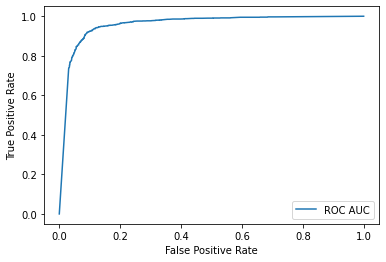

In [73]:
fpr, tpr, _ = roc_curve(fin_ip, fin_op_thresh)
plt.plot(fpr, tpr, label='ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

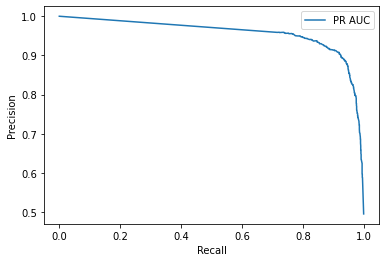

In [74]:
plt.plot(recall, precision, label='PR AUC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()